In [49]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

# EDA(exploratory data analysis)

In [50]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv (1).zip",encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## insights 

in this cell we do not have any column names

In [51]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [52]:
data.dtypes

target        int64
ids           int64
date         object
flag         object
user         object
TweetText    object
dtype: object

In [4]:
data.shape

(1599999, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1599999 non-null  int64 
 1   ids        1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   TweetText  1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
data.describe(include='all')

,target,ids,date,flag,user,TweetText
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,NaN,774362,1,659775,1581465
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1599999,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

target       0
ids          0
date         0
flag         0
user         0
TweetText    0
dtype: int64

In [8]:
data.duplicated().sum()

0

## dropping the unwanted columns

In [9]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [10]:
data.head()

,target,TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew


In [41]:
positif_data = data[data.target==4].iloc[:25000,:]
print(positif_data.shape)
negative_data = data[data.target==0].iloc[:1000,:]
print(negative_data.shape)

(25000, 3)
(1000, 3)


In [46]:
neutral_data = data[data.target==2]
print(neutral_data.shape)

(0, 3)


In [12]:
data = pd.concat([positif_data,negative_data],axis = 0)
print(data.shape)
data.head()

(26000, 2)


,target,TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone


## Data Cleaning
### Removing Twitter Handles (@user)

In [13]:
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone


 ## Removing links

In [14]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone


## Removing Punctuations, Numbers, and Special Characters

In [15]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health UandPets u guys r the best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight Cant wait GIRL TALK
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",DaRealSunisaKim Thanks for the Twitter add Sunisa I got to meet you once at a HIN show here in the DC area and you were a sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",Being sick can be really cheap when it hurts too much to eat real food Plus your friends make you soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn he has that effect on everyone


## Remove stop words

In [16]:
stopwords=nltk.corpus.stopwords.words('english')

In [17]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [18]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting one besties tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thanks twitter add sunisa got meet hin show dc area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick really cheap hurts much eat real food plus friends make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


## Text Tokenization and Normalization

In [19]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpets, u, guys, r, best]"
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meeting, one, besties, tonight, cant, wait, girl, talk]"
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thanks, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, really, cheap, hurts, much, eat, real, food, plus, friends, make, soup]"
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyone]"


In [20]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpet, u, guy, r, best]"
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meet, one, besti, tonight, cant, wait, girl, talk]"
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thank, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, realli, cheap, hurt, much, eat, real, food, plu, friend, make, soup]"
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyon]"


## Now let’s stitch these tokens back together

In [21]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,TweetText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet u guy r best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meet one besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter add sunisa got meet hin show dc area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much eat real food plu friend make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


## Removing small words

In [54]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

KeyError: 'Clean_TweetText'

In [23]:
##Data Vizualisation

##In this section we will visualize the tweets using wordclouds. A wordcloud is a visualization wherein the most
## frequent words appear in large size and the less frequent words appear in smaller sizes

## What are the most common words in the entire dataset?

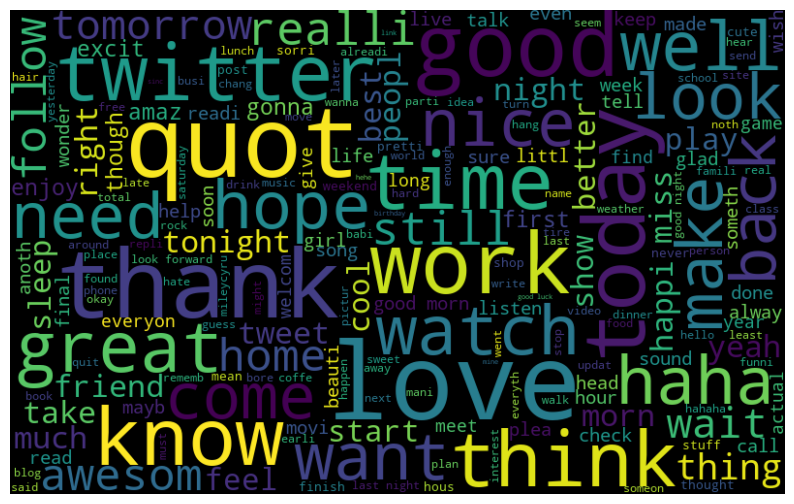

In [24]:
all_words = ' '.join([text for text in data['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## What are the most common words in the dataset for Positive and Depressive tweets, respectively?

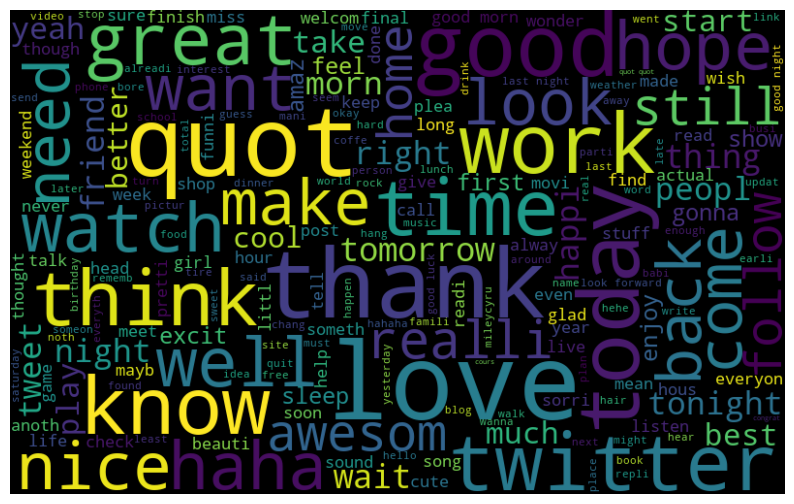

In [25]:
positive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 4]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

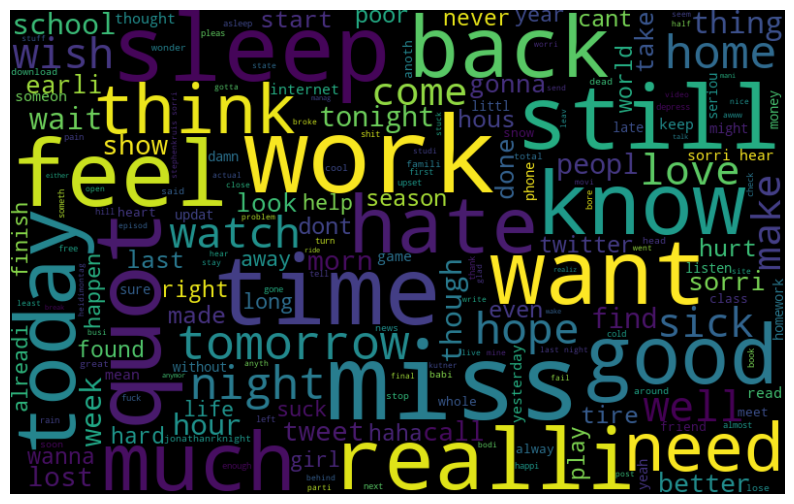

In [26]:
depressive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## model building

In [27]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(26000, 27119)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

# Model Training

## Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(f"the accuracy of random forest is {accuracy_score(prediction_rf,y_test)}")

the accuracy of random forest is 0.9592307692307692


## Support vector machine

In [33]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(f"The Accuracy of SVM is {accuracy_score(prediction_svc, y_test)}")


The Accuracy of SVM is 0.9619230769230769


## Logistic Regression

In [34]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(f"The accuracy of logistic regression is {accuracy_score(prediction_lr,y_test)}")

The accuracy of logistic regression is 0.9628846153846153


## Linear regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate and fit the linear regression model
ll = LinearRegression()
ll.fit(X_train, y_train)

# Make predictions on the test set
prediction_ll = ll.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, prediction_ll)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.9747173071838418
